In [1]:
#Making initial imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#reading csv file into a pandas Dataframe
df1 = pd.read_csv('Bengaluru_House_Data.csv')

In [3]:
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
#Getting Info about data
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [5]:
#Lets see the size of data 
df1.shape

(13320, 9)

In [6]:
#Lets analyze availability column
df1['availability'].unique()
#Difficult to handle. Lets remove it

array(['19-Dec', 'Ready To Move', '18-May', '18-Feb', '18-Nov', '20-Dec',
       '17-Oct', '21-Dec', '19-Sep', '20-Sep', '18-Mar', '20-Feb',
       '18-Apr', '20-Aug', '18-Oct', '19-Mar', '17-Sep', '18-Dec',
       '17-Aug', '19-Apr', '18-Jun', '22-Dec', '22-Jan', '18-Aug',
       '19-Jan', '17-Jul', '18-Jul', '21-Jun', '20-May', '19-Aug',
       '18-Sep', '17-May', '17-Jun', '21-May', '18-Jan', '20-Mar',
       '17-Dec', '16-Mar', '19-Jun', '22-Jun', '19-Jul', '21-Feb',
       'Immediate Possession', '19-May', '17-Nov', '20-Oct', '20-Jun',
       '19-Feb', '21-Oct', '21-Jan', '17-Mar', '17-Apr', '22-May',
       '19-Oct', '21-Jul', '21-Nov', '21-Mar', '16-Dec', '22-Mar',
       '20-Jan', '21-Sep', '21-Aug', '14-Nov', '19-Nov', '15-Nov',
       '16-Jul', '15-Jun', '17-Feb', '20-Nov', '20-Jul', '16-Sep',
       '15-Oct', '15-Dec', '16-Oct', '22-Nov', '15-Aug', '17-Jan',
       '16-Nov', '20-Apr', '16-Jan', '14-Jul'], dtype=object)

In [7]:
df1.drop('availability',axis=1,inplace=True)

In [8]:
#Availability has been dropped
df1.head()

,area_type,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [9]:
#Lets analyze area_type
df1['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [10]:
#Lets one-hot encode this
area = pd.get_dummies(df1['area_type'],drop_first=True)
area

,Carpet Area,Plot Area,Super built-up Area
0,0,0,1
1,0,1,0
2,0,0,0
3,0,0,1
4,0,0,1
...,...,...,...
13315,0,0,0
13316,0,0,1
13317,0,0,0
13318,0,0,1


In [11]:
#Lets Merge the two data frames and drop area_type column
df2 = pd.concat([df1,area],axis=1)

In [12]:
df2.head()

,area_type,location,size,society,total_sqft,bath,balcony,price,Carpet Area,Plot Area,Super built-up Area
0,Super built-up Area,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07,0,0,1
1,Plot Area,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,0,1,0
2,Built-up Area,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00,0,0,0
3,Super built-up Area,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00,0,0,1
4,Super built-up Area,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00,0,0,1


In [13]:
df2.drop('area_type',inplace=True,axis=1)

In [14]:
df2.head()

,location,size,society,total_sqft,bath,balcony,price,Carpet Area,Plot Area,Super built-up Area
0,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07,0,0,1
1,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,0,1,0
2,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00,0,0,0
3,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00,0,0,1
4,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00,0,0,1


In [15]:
df2.drop('society',inplace=True,axis=1)

In [16]:
df2.head()

,location,size,total_sqft,bath,balcony,price,Carpet Area,Plot Area,Super built-up Area
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,0,0,1
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,0,1,0
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,0,0,0
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,0,0,1
4,Kothanur,2 BHK,1200,2.0,1.0,51.00,0,0,1


In [17]:
#Lets analyze balcony

C:\Users\yashw\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='balcony', ylabel='count'>

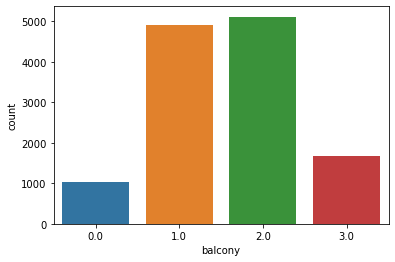

In [18]:
sns.countplot(df2['balcony'])

In [19]:
#balcony has a few null values, lets fill it with 2
df2['balcony'] = df2['balcony'].fillna(value=2.0)

In [20]:
df2.isnull().sum()

location                 1
size                    16
total_sqft               0
bath                    73
balcony                  0
price                    0
Carpet  Area             0
Plot  Area               0
Super built-up  Area     0
dtype: int64

In [21]:
#Lets drop remaining null values as they are less

In [22]:
df3 = df2.dropna()

In [23]:
df3.head()

,location,size,total_sqft,bath,balcony,price,Carpet Area,Plot Area,Super built-up Area
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,0,0,1
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,0,1,0
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,0,0,0
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,0,0,1
4,Kothanur,2 BHK,1200,2.0,1.0,51.00,0,0,1


In [24]:
#lets deal with BHK
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [25]:
df3['bhk'] = df3['size'].apply(lambda x: x.split(" ")[0])

C:\Users\yashw\AppData\Local\Temp/ipykernel_17592/4014045060.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk'] = df3['size'].apply(lambda x: x.split(" ")[0])


In [26]:
df3['bhk'] = df3['bhk'].apply(lambda x: int(x))
df3.drop('size',axis=1,inplace=True)

C:\Users\yashw\AppData\Local\Temp/ipykernel_17592/2095959907.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk'] = df3['bhk'].apply(lambda x: int(x))
C:\Users\yashw\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [27]:
df3.head()

,location,total_sqft,bath,balcony,price,Carpet Area,Plot Area,Super built-up Area,bhk
0,Electronic City Phase II,1056,2.0,1.0,39.07,0,0,1,2
1,Chikka Tirupathi,2600,5.0,3.0,120.00,0,1,0,4
2,Uttarahalli,1440,2.0,3.0,62.00,0,0,0,3
3,Lingadheeranahalli,1521,3.0,1.0,95.00,0,0,1,3
4,Kothanur,1200,2.0,1.0,51.00,0,0,1,2


In [28]:
# we can find some houses with more than 20 bedrooms but low sqft area.
# To clean those errors, we need a better estimate for our sqft area

In [29]:
df3['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [30]:
# We have some values in the form of a range, i.e '1133 - 1384'.
# We need to identify these and replace them with their avg value

In [31]:
# Lets identify float values in that column
def FindFloats(x):
    try:
        float(x)
    except:
        return False
    return True

In [32]:
df3[~df3['total_sqft'].apply(FindFloats)]
#SO a total of 190 columns have sqft area in the form of a range.
# But some of them are represented as 34.4sq metres, 4126 perch etc....

,location,total_sqft,bath,balcony,price,Carpet Area,Plot Area,Super built-up Area,bhk
30,Yelahanka,2100 - 2850,4.0,0.0,186.000,0,0,1,4
122,Hebbal,3067 - 8156,4.0,0.0,477.000,0,0,1,4
137,8th Phase JP Nagar,1042 - 1105,2.0,0.0,54.005,0,0,1,2
165,Sarjapur,1145 - 1340,2.0,0.0,43.490,0,0,1,2
188,KR Puram,1015 - 1540,2.0,0.0,56.800,0,0,1,2
...,...,...,...,...,...,...,...,...,...
12975,Whitefield,850 - 1060,2.0,0.0,38.190,0,0,1,2
12990,Talaghattapura,1804 - 2273,3.0,0.0,122.000,0,0,1,3
13059,Harlur,1200 - 1470,2.0,0.0,72.760,0,0,1,2
13265,Hoodi,1133 - 1384,2.0,0.0,59.135,0,0,1,2


In [33]:
def ConvertRanges(x):
    tokens = x.split('-')
    #This if executes only when the data is like a range
    if len(tokens) == 2:
        return (float(tokens[0]) + float(tokens[1]))/2
    #This part executes otherwise
    try:
        return float(x)
    except:
        return None

In [34]:
#Lets test our func
ConvertRanges('26333'),ConvertRanges('29901-31311')

(26333.0, 30606.0)

In [35]:
df4 = df3.copy()
df4['total_sqft'] = df4['total_sqft'].apply(ConvertRanges)

In [36]:
df4.head()

,location,total_sqft,bath,balcony,price,Carpet Area,Plot Area,Super built-up Area,bhk
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,0,0,1,2
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,0,1,0,4
2,Uttarahalli,1440.0,2.0,3.0,62.00,0,0,0,3
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,0,0,1,3
4,Kothanur,1200.0,2.0,1.0,51.00,0,0,1,2


In [37]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13246 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   location              13246 non-null  object 
 1   total_sqft            13200 non-null  float64
 2   bath                  13246 non-null  float64
 3   balcony               13246 non-null  float64
 4   price                 13246 non-null  float64
 5   Carpet  Area          13246 non-null  uint8  
 6   Plot  Area            13246 non-null  uint8  
 7   Super built-up  Area  13246 non-null  uint8  
 8   bhk                   13246 non-null  int64  
dtypes: float64(4), int64(1), object(1), uint8(3)
memory usage: 763.2+ KB


In [38]:
df4.isnull().sum()

location                 0
total_sqft              46
bath                     0
balcony                  0
price                    0
Carpet  Area             0
Plot  Area               0
Super built-up  Area     0
bhk                      0
dtype: int64

In [39]:
df4 = df4.dropna()

# Feature Engineering

In [40]:
#Lets create price/sqft column
df5 = df4.copy()
df5['price-per-sqft'] = df5['price']/df5['total_sqft']

In [41]:
df5.head()

,location,total_sqft,bath,balcony,price,Carpet Area,Plot Area,Super built-up Area,bhk,price-per-sqft
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,0,0,1,2,0.036998
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,0,1,0,4,0.046154
2,Uttarahalli,1440.0,2.0,3.0,62.00,0,0,0,3,0.043056
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,0,0,1,3,0.062459
4,Kothanur,1200.0,2.0,1.0,51.00,0,0,1,2,0.042500


In [42]:
#Lets analyze location column.
df5['location'] = df5['location'].apply(lambda x: x.strip())
loc_stats = df5.groupby('location')['location'].agg('count').sort_values(ascending = False)

In [43]:
loc_stats

location
Whitefield               533
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           264
Thanisandra              235
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Kannur                     1
whitefiled                 1
Name: location, Length: 1287, dtype: int64

In [44]:
# Since the location distribution is biased, lets say the locations with less than 10 values are classified as other

In [45]:
loc_stats_less_than_10 = loc_stats[loc_stats<=10]

In [46]:
loc_stats_less_than_10

location
Sadashiva Nagar          10
Naganathapura            10
Basapura                 10
Nagadevanahalli          10
Kalkere                  10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Kannur                    1
whitefiled                1
Name: location, Length: 1047, dtype: int64

In [47]:
df5['location'] = df5['location'].apply(lambda x: 'other' if x in loc_stats_less_than_10 else x)

In [48]:
df5['location'].nunique()

241

# Outlier Detection & removal

In [49]:
df5.head(10)

,location,total_sqft,bath,balcony,price,Carpet Area,Plot Area,Super built-up Area,bhk,price-per-sqft
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,0,0,1,2,0.036998
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,0,1,0,4,0.046154
2,Uttarahalli,1440.0,2.0,3.0,62.00,0,0,0,3,0.043056
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,0,0,1,3,0.062459
4,Kothanur,1200.0,2.0,1.0,51.00,0,0,1,2,0.042500
5,Whitefield,1170.0,2.0,1.0,38.00,0,0,1,2,0.032479
6,Old Airport Road,2732.0,4.0,2.0,204.00,0,0,1,4,0.074671
7,Rajaji Nagar,3300.0,4.0,2.0,600.00,0,0,1,4,0.181818
8,Marathahalli,1310.0,3.0,1.0,63.25,0,0,1,3,0.048282
9,other,1020.0,6.0,2.0,370.00,0,1,0,6,0.362745


In [50]:
# From common knowledge, a 1BHK house has nearly 300 sqft total area,
# so we will remove any houses with, like 6BHK and 1000sqft total area

In [51]:
df5[df5['total_sqft']/df5['bhk']<300]

,location,total_sqft,bath,balcony,price,Carpet Area,Plot Area,Super built-up Area,bhk,price-per-sqft
9,other,1020.0,6.0,2.0,370.0,0,1,0,6,0.362745
45,HSR Layout,600.0,9.0,2.0,200.0,0,1,0,8,0.333333
58,Murugeshpalya,1407.0,4.0,1.0,150.0,0,1,0,6,0.106610
68,Devarachikkanahalli,1350.0,7.0,0.0,85.0,0,1,0,8,0.062963
70,other,500.0,3.0,2.0,100.0,0,1,0,3,0.200000
...,...,...,...,...,...,...,...,...,...,...
13277,other,1400.0,7.0,2.0,218.0,0,1,0,7,0.155714
13279,other,1200.0,5.0,2.0,130.0,0,1,0,6,0.108333
13281,Margondanahalli,1375.0,5.0,1.0,125.0,0,1,0,5,0.090909
13303,Vidyaranyapura,774.0,5.0,3.0,70.0,0,1,0,5,0.090439


In [52]:
df5.shape

(13200, 10)

In [53]:
df6 = df5[~(df5['total_sqft']/df5['bhk']<300)]

In [54]:
# Now lets remove extreme cases in prices

In [55]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf['price-per-sqft'])
        st = np.std(subdf['price-per-sqft'])
        reduced_df = subdf[(subdf['price-per-sqft']>(m-st)) & (subdf['price-per-sqft']<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df7 = remove_pps_outliers(df6)
df7.shape

(10242, 10)

In [56]:
# Let's check if for a given location how does the 2 BHK and 3 BHK property prices look like

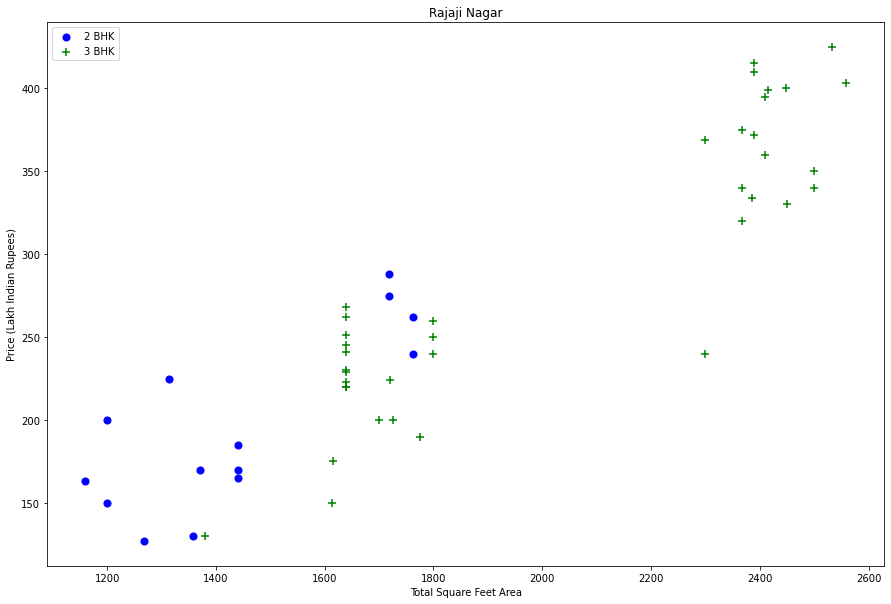

In [57]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    plt.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df7,"Rajaji Nagar")

We should also remove properties where for same location, the price of (for example) 3 bedroom apartment is less than 2 bedroom apartment (with same square ft area). What we will do is for a given location, we will build a dictionary of stats per bhk, i.e.

{
    '1' : {
        'mean': 4000,
        'std: 2000,
        'count': 34
    },
    '2' : {
        'mean': 4300,
        'std: 2300,
        'count': 22
    },    
}
Now we can remove those 2 BHK apartments whose price_per_sqft is less than mean price_per_sqft of 1 BHK apartment

In [58]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df['price-per-sqft']),
                'std': np.std(bhk_df['price-per-sqft']),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df['price-per-sqft']<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df8 = remove_bhk_outliers(df7)
# df8 = df7.copy()
df8.shape

(7317, 10)

Text(0.5, 0, 'price-per-sqft')

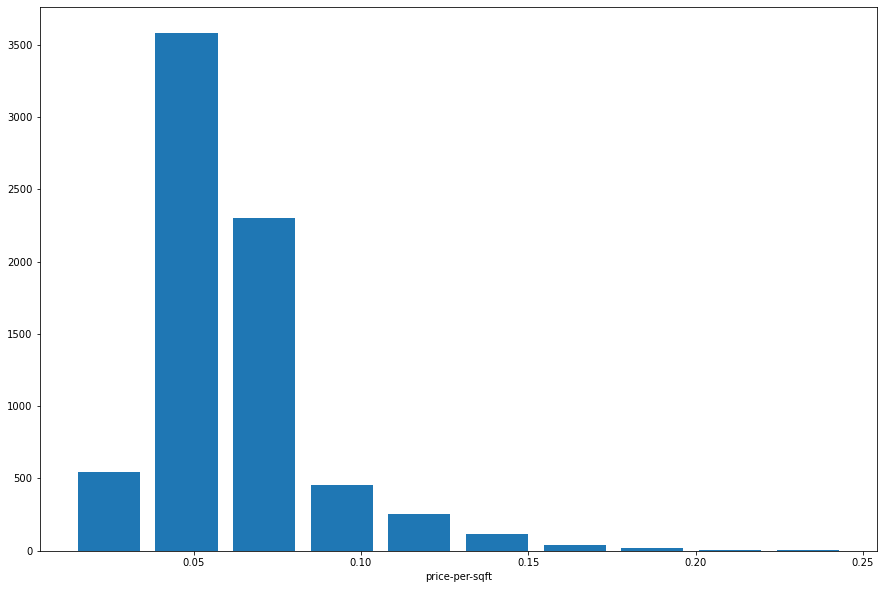

In [59]:
plt.hist(df8['price-per-sqft'],rwidth=0.8)
plt.xlabel('price-per-sqft')

In [60]:
# Now lets explore bathrooms

In [61]:
df8['bath'].unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [62]:
# From common knowledge, if the number of bathrooms is greater than number of bedrooms + 2, we remove them

(array([4.756e+03, 1.763e+03, 6.760e+02, 8.100e+01, 2.900e+01, 7.000e+00,
        0.000e+00, 3.000e+00, 1.000e+00, 1.000e+00]),
 array([ 1. ,  2.5,  4. ,  5.5,  7. ,  8.5, 10. , 11.5, 13. , 14.5, 16. ]),
 <BarContainer object of 10 artists>)

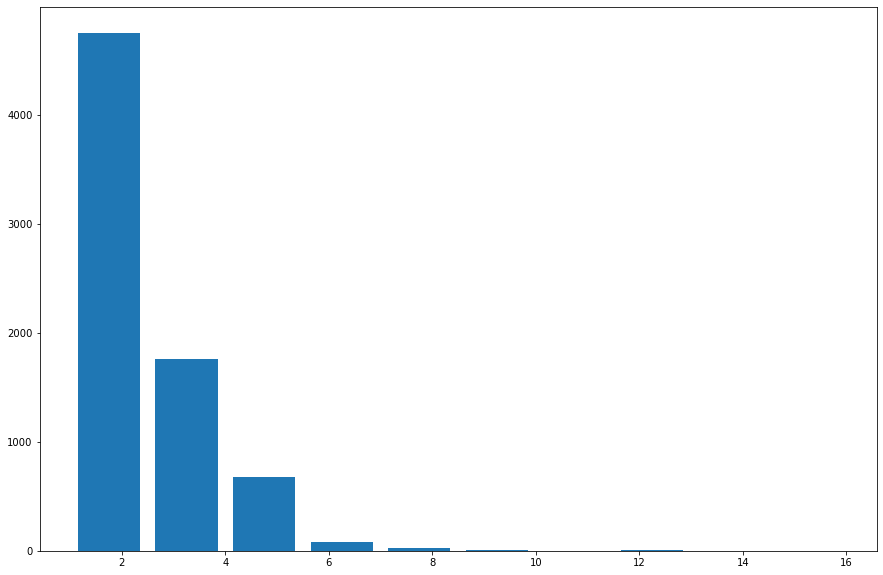

In [63]:
plt.hist(df8['bath'],rwidth=0.8)

In [64]:
df8[df8['bath'] > df8['bhk'] +2]

,location,total_sqft,bath,balcony,price,Carpet Area,Plot Area,Super built-up Area,bhk,price-per-sqft
1626,Chikkabanavar,2460.0,7.0,2.0,80.0,0,0,0,4,0.032520
5238,Nagasandra,7000.0,8.0,2.0,450.0,0,0,0,4,0.064286
6711,Thanisandra,1806.0,6.0,2.0,116.0,0,0,1,3,0.064230
8408,other,11338.0,9.0,1.0,1000.0,0,0,1,6,0.088199


In [65]:
df9 = df8[df8['bath'] < df8['bhk'] +2]

In [66]:
df9.shape

(7239, 10)

In [67]:
# Now we will drop price-per-sqft feature as we created it just for outlier detection

In [68]:
df9.drop('price-per-sqft',axis=1,inplace=True)

C:\Users\yashw\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [69]:
df9.head()

,location,total_sqft,bath,balcony,price,Carpet Area,Plot Area,Super built-up Area,bhk
0,1st Block Jayanagar,2850.0,4.0,1.0,428.0,0,0,1,4
1,1st Block Jayanagar,1630.0,3.0,2.0,194.0,0,0,1,3
2,1st Block Jayanagar,1875.0,2.0,3.0,235.0,0,0,1,3
3,1st Block Jayanagar,1200.0,2.0,0.0,130.0,0,0,0,3
4,1st Block Jayanagar,1235.0,2.0,2.0,148.0,0,0,1,2


# Model Building

In [70]:
# Lets one-hot encode location column

In [71]:
dummies = pd.get_dummies(df9['location'])

In [72]:
df10 = pd.concat([df9,dummies.drop('other',axis=1)],axis=1)

In [73]:
df10.head()

,location,total_sqft,bath,balcony,price,Carpet Area,Plot Area,Super built-up Area,bhk,1st Block Jayanagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,1.0,428.0,0,0,1,4,1,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,2.0,194.0,0,0,1,3,1,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,3.0,235.0,0,0,1,3,1,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,0.0,130.0,0,0,0,3,1,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,2.0,148.0,0,0,1,2,1,...,0,0,0,0,0,0,0,0,0,0


In [74]:
df10.drop('location',axis=1,inplace=True)

In [75]:
# Lets Start model building

In [76]:
X = df10.drop('price',axis=1)
y = df10['price']

In [77]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [78]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train,y_train)
lr_model.score(X_test,y_test)

0.8645541617434587

In [79]:
# Now we are going to try a couple of different models and parametres to check the best one

In [80]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
cross_val_score(LinearRegression(),X,y,cv=cv)

array([0.82584357, 0.86193268, 0.85551802, 0.84458629, 0.85596842])

In [81]:
# So for Linear Regression, we are getting more than 80% accuracy most of the time
# Lets compare different algos using GridSearchCV

In [82]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
         },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,0.848770,{'normalize': False}
1,lasso,0.728465,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.696113,"{'criterion': 'mse', 'splitter': 'best'}"


In [83]:
# SO, Linear Regression performs best with parametre normalize set to false

In [84]:
#Lets write a price predicting function
def Predict_Price(location,sqft,bath,bhk):
    loc_index = np.where(X.columns==location)[0][0]
    
    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    
    if loc_index >=0 :
        x[loc_index] = 1
    return lr_model.predict([x])[0]

In [85]:
#Lets predict price
Predict_Price('1st Phase JP Nagar',1000,3,3)

88.1508534608669

# Export Model

In [86]:
import pickle
with open('Banglore_Real_Estate_Price_Prediction.pickle','wb') as f:
    pickle.dump(lr_model,f)

In [87]:
# We also need to export column information

In [88]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))